In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('ObesityDataSet.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC_yes.2,CALC_Always.2,CALC_Frequently.2,CALC_Sometimes.2,CALC_no.2,MTRANS_Automobile.2,MTRANS_Bike.2,MTRANS_Motorbike.2,MTRANS_Public_Transportation.2,MTRANS_Walking.2
0,1,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,False,False,False,False,True,False,False,False,True,False
1,1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,True,False,False,True,False,False,False,False,True,False
2,0,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,False,False,True,False,False,False,False,False,True,False
3,0,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,False,False,True,False,False,False,False,False,False,True
4,0,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,False,False,False,True,False,False,False,False,True,False


In [4]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC_yes.2,CALC_Always.2,CALC_Frequently.2,CALC_Sometimes.2,CALC_no.2,MTRANS_Automobile.2,MTRANS_Bike.2,MTRANS_Motorbike.2,MTRANS_Public_Transportation.2,MTRANS_Walking.2
2106,1,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,False,False,False,True,False,False,False,False,True,False
2107,1,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,False,False,False,True,False,False,False,False,True,False
2108,1,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,False,False,False,True,False,False,False,False,True,False
2109,1,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,False,False,False,True,False,False,False,False,True,False
2110,1,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,...,False,False,False,True,False,False,False,False,True,False


In [5]:
df.shape

(2111, 93)

In [6]:
df.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
                                   ...   
MTRANS_Automobile.2                  bool
MTRANS_Bike.2                        bool
MTRANS_Motorbike.2                   bool
MTRANS_Public_Transportation.2       bool
MTRANS_Walking.2                     bool
Length: 93, dtype: object

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
                                 ..
MTRANS_Automobile.2               0
MTRANS_Bike.2                     0
MTRANS_Motorbike.2                0
MTRANS_Public_Transportation.2    0
MTRANS_Walking.2                  0
Length: 93, dtype: int64

In [8]:
df.describe()

,Gender,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,0.500083,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,0.000000,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,1.000000,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,1.000000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Cleaning

In [9]:
df['Gender'] = df['Gender'].replace({'Female': 1 ,'Male' : 0})

In [10]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'Yes': 1 ,'No' : 0})

In [11]:
df['FAVC'] = df['FAVC'].replace({'Yes': 1 ,'No' : 0})

In [12]:
df['SMOKE'] = df['SMOKE'].replace({'Yes': 1 ,'No' : 0})

In [13]:
df['SCC'] = df['SCC'].replace({'Yes': 1 ,'No' : 0})

In [14]:
df['Weight_Category'] = df['NObeyesdad'].replace({'Normal_Weight' : 0, 'Insufficient_Weight': -1, 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Obesity_Type_I': 3,'Obesity_Type_II' : 4, 'Obesity_Type_III': 5})

In [15]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

# EDA

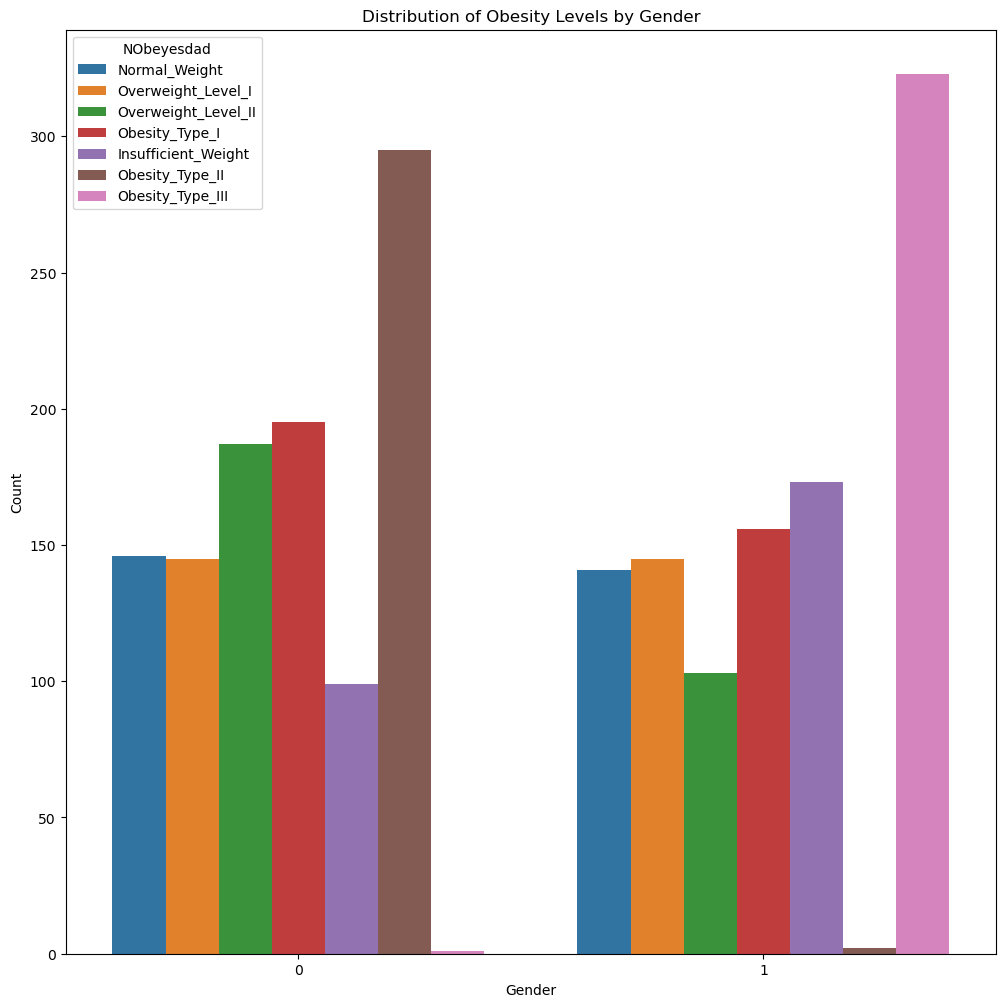

In [12]:
plt.figure(figsize = (12,12))
sns.countplot(data = df,
            x = 'Gender',
            hue = 'NObeyesdad')
plt.title ('Distribution of Obesity Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('countplot1');

> It appears Obesity_Type_II and Obesity_Type_I are more common in Men and Obesity_Type_III and Insufficient Weight are more common in woman. While Obesity_Type_III is least commmon for men and Obesity_Type_II is least common for women. 

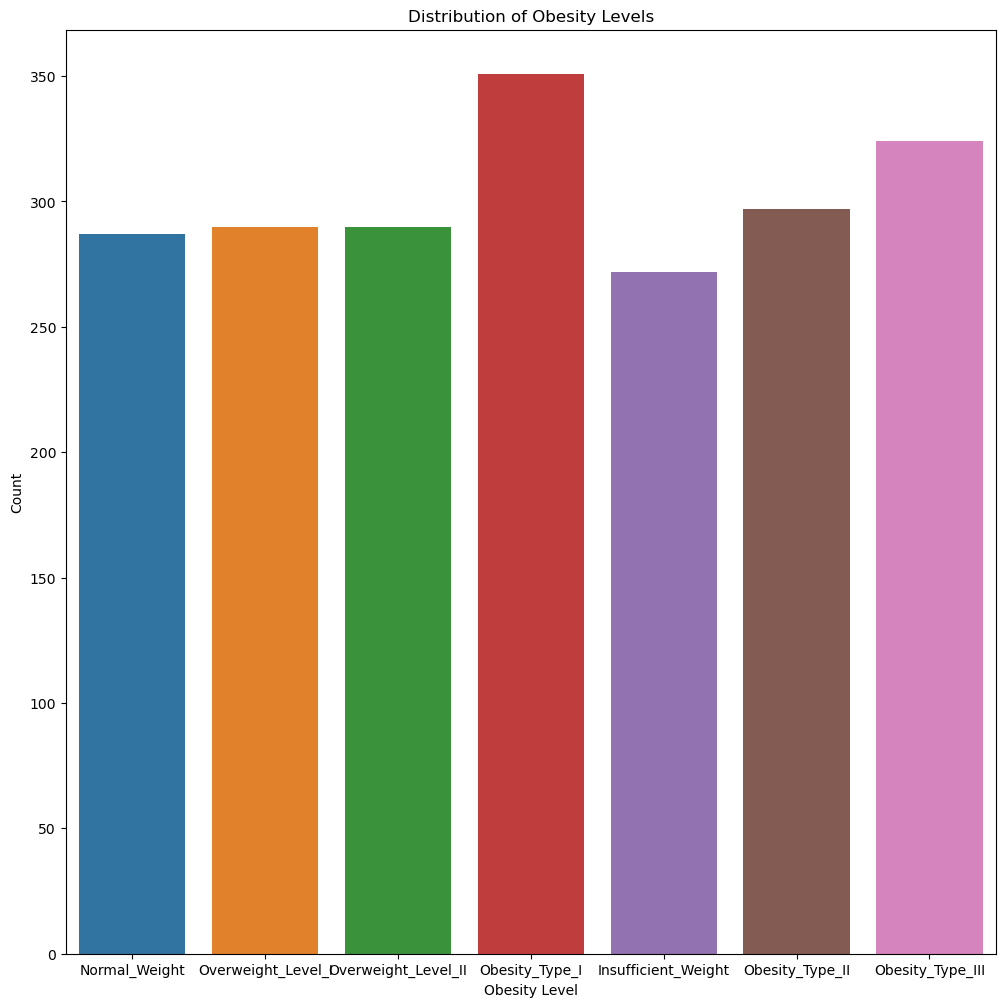

In [6]:
plt.figure(figsize = (12,12))
sns.countplot(data = df,
            x= 'NObeyesdad')
plt.title ('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.savefig('countplot2');

> Obesity Type I appears to be most common. Obesity Type III is the second most common. Normal weight, overweight level I, Overweight Level II and Obesity Type II are very similar with very little differences. While Insufficient weight is the least common Obesity level.

In [18]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [19]:
df['NObeyesdad'].value_counts(normalize = True)

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

In [20]:
df['Weight'].value_counts()

Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64

In [21]:
df['Gender'].value_counts(normalize = True)

Gender
0    0.505921
1    0.494079
Name: proportion, dtype: float64

In [22]:
df['Weight'].min()

39.0

In [23]:
df.loc[df['Weight'] == 39.0]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC_Always.2,CALC_Frequently.2,CALC_Sometimes.2,CALC_no.2,MTRANS_Automobile.2,MTRANS_Bike.2,MTRANS_Motorbike.2,MTRANS_Public_Transportation.2,MTRANS_Walking.2,Weight_Category
395,1,20.0,1.54,39.0,yes,yes,1.0,3.0,Sometimes,no,...,False,False,True,False,False,False,False,True,False,-1


In [24]:
df['Weight'].max()

173.0

In [25]:
df.loc[df['Weight'] == 173.0]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC_Always.2,CALC_Frequently.2,CALC_Sometimes.2,CALC_no.2,MTRANS_Automobile.2,MTRANS_Bike.2,MTRANS_Motorbike.2,MTRANS_Public_Transportation.2,MTRANS_Walking.2,Weight_Category
344,0,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,...,False,False,True,False,False,False,False,True,False,5


In [26]:
df.sort_values(by = 'Weight', ascending = False)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC_Always.2,CALC_Frequently.2,CALC_Sometimes.2,CALC_no.2,MTRANS_Automobile.2,MTRANS_Bike.2,MTRANS_Motorbike.2,MTRANS_Public_Transportation.2,MTRANS_Walking.2,Weight_Category
344,0,18.000000,1.870000,173.000000,yes,yes,3.000000,3.000000,Frequently,no,...,False,False,True,False,False,False,False,True,False,5
502,1,21.900120,1.843419,165.057269,yes,yes,3.000000,3.000000,Sometimes,no,...,False,False,True,False,False,False,False,True,False,5
1898,1,19.472190,1.793824,160.935351,yes,yes,3.000000,3.000000,Sometimes,no,...,False,False,True,False,False,False,False,True,False,5
1910,1,21.521294,1.803677,160.639405,yes,yes,3.000000,3.000000,Sometimes,no,...,False,False,True,False,False,False,False,True,False,5
1838,1,20.989016,1.807340,155.872093,yes,yes,3.000000,3.000000,Sometimes,no,...,False,False,True,False,False,False,False,True,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,1,18.530840,1.573816,39.850137,no,yes,1.214980,1.717608,Sometimes,no,...,False,False,True,False,False,False,False,True,False,-1
636,1,19.054008,1.556611,39.695295,no,yes,1.889199,2.217651,Sometimes,no,...,False,False,True,False,False,False,False,True,False,-1
589,1,19.948140,1.530884,39.371523,no,yes,1.522001,3.000000,Sometimes,no,...,False,False,True,False,False,False,False,True,False,-1
725,1,19.994543,1.537739,39.101805,no,yes,1.118436,3.000000,Sometimes,no,...,False,False,True,False,False,False,False,True,False,-1


In [27]:
df['Weight'].mean()

86.58605812648035

In [28]:
df['Weight'].median()

83.0

In [29]:
df['Weight'].mode()

0    80.0
Name: Weight, dtype: float64

In [30]:
df['Gender'].value_counts()

Gender
0    1068
1    1043
Name: count, dtype: int64

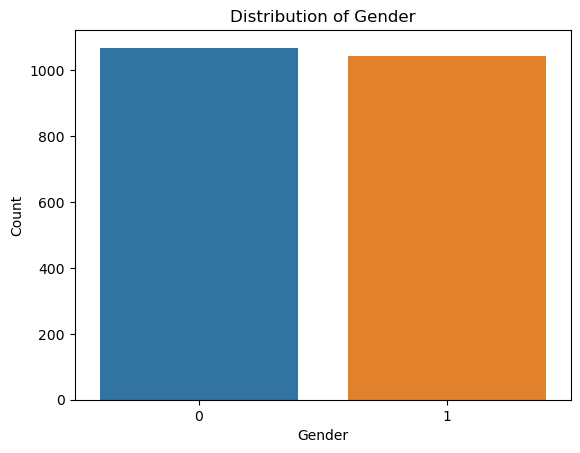

In [7]:
sns.countplot(data = df,
            x =  'Gender')
plt.title ('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('countplot3');

> There are 1068 Males and 1043 females as participants. 

In [32]:
df.groupby('Gender')['Weight'].mean()

Gender
0    90.769478
1    82.302364
Name: Weight, dtype: float64

In [33]:
df.groupby('Height')['Weight'].mean()

Height
1.450000     53.000000
1.456346     55.523481
1.480000     60.000000
1.481682     61.373868
1.483284     62.894283
               ...    
1.931263    118.203130
1.942725    121.657979
1.947406    116.893105
1.975663    120.702935
1.980000    125.000000
Name: Weight, Length: 1574, dtype: float64

In [34]:
df.groupby('family_history_with_overweight')['Weight'].mean()

family_history_with_overweight
no     59.041141
yes    92.730202
Name: Weight, dtype: float64

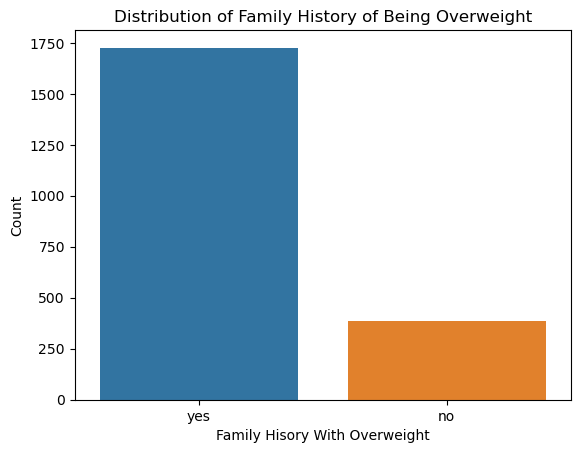

In [8]:
sns.countplot(data = df,
             x = 'family_history_with_overweight')
plt.title('Distribution of Family History of Being Overweight')
plt.xlabel('Family Hisory With Overweight')
plt.ylabel('Count')
plt.savefig('countplot4');

> More people have a family history of being overweight with a count of almost 1750 than those who do not with a count between 250 and 500. 

In [36]:
df['family_history_with_overweight'].value_counts(normalize = True)

family_history_with_overweight
yes    0.817622
no     0.182378
Name: proportion, dtype: float64

In [37]:
df.groupby('FAVC')['Weight'].mean()

FAVC
no     66.908408
yes    89.169672
Name: Weight, dtype: float64

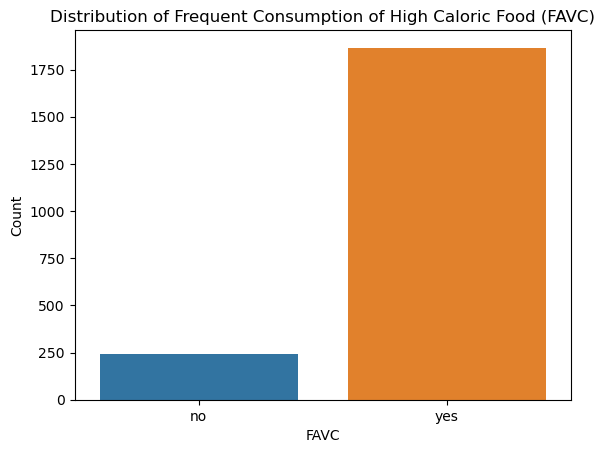

In [9]:
sns.countplot(data = df,
             x = 'FAVC')
plt.title('Distribution of Frequent Consumption of High Caloric Food (FAVC)')
plt.xlabel('FAVC')
plt.ylabel('Count')
plt.savefig('countplot5');

> More participants say they frequently consume high caloric foods with a count over 1750. Less participants state they do not eat high caloric foods with a count of 250.

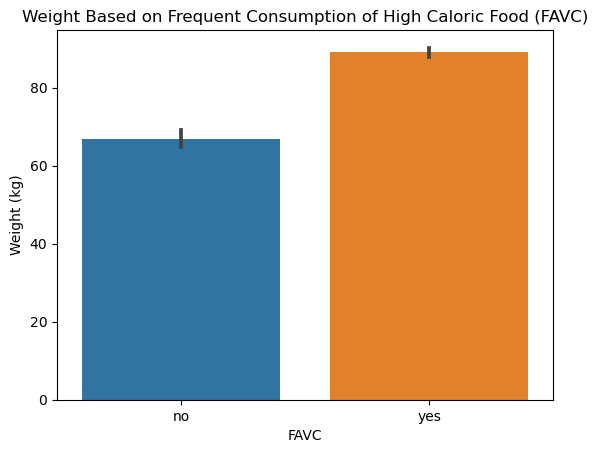

In [19]:
sns.barplot(data = df,
             x = 'FAVC',
             y = 'Weight')
plt.title('Weight Based on Frequent Consumption of High Caloric Food (FAVC)')
plt.xlabel('FAVC')
plt.ylabel('Weight (kg)')
plt.savefig('barplot1');

> Those who frequently eat high caloric foods tend to have a higher weight compared to those who do not frequently eat high caloric foods.

In [40]:
df.groupby('FCVC')['Weight'].mean()

FCVC
1.000000     67.069697
1.003566     50.000000
1.005578     50.000000
1.008760     82.000000
1.031149     50.000000
               ...    
2.996717    120.337664
2.997524    100.642257
2.997951    120.699119
2.998441    118.548733
3.000000     95.259465
Name: Weight, Length: 810, dtype: float64

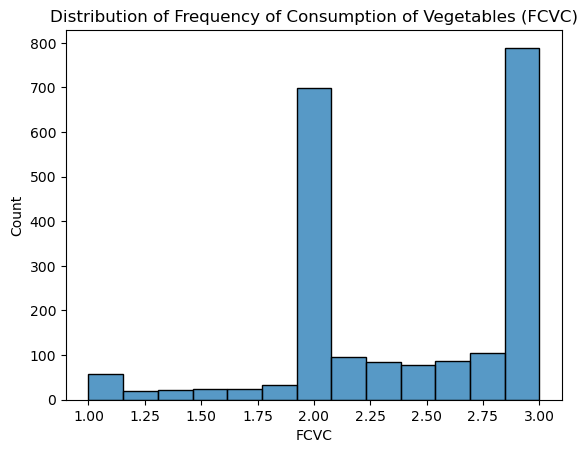

In [7]:
sns.histplot(data = df,
              x = 'FCVC')
plt.title('Distribution of Frequency of Consumption of Vegetables (FCVC)')
plt.xlabel('FCVC')
plt.ylabel('Count')
plt.savefig('histplot1');

> More People consume vegetables than do not with a frequency of 2.00 having a count of almost 700 and a frequency of 3.00 having a count of almost 800. 

In [42]:
df['FCVC'].value_counts()

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

In [43]:
df.groupby('CAEC')['Weight'].mean()

CAEC
Always        71.090566
Frequently    58.885678
Sometimes     91.360344
no            68.902489
Name: Weight, dtype: float64

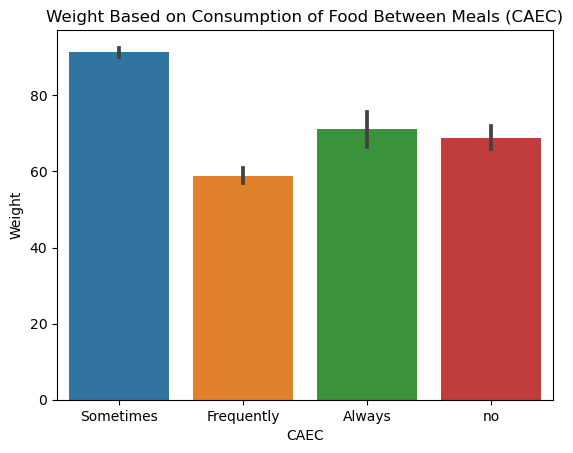

In [44]:
sns.barplot(data = df,
              x = 'CAEC',
              y = 'Weight')
plt.title('Weight Based on Consumption of Food Between Meals (CAEC)')
plt.xlabel('CAEC')
plt.ylabel('Weight')
plt.savefig('barplot2');

> Participants who say they sometimes eat food between meals has the highest weight. Those who always eat between meals has the second highest weight.Those who say they do not eat between meals has the third highest weight and the least highest weight is those who frequently eat between meals. 

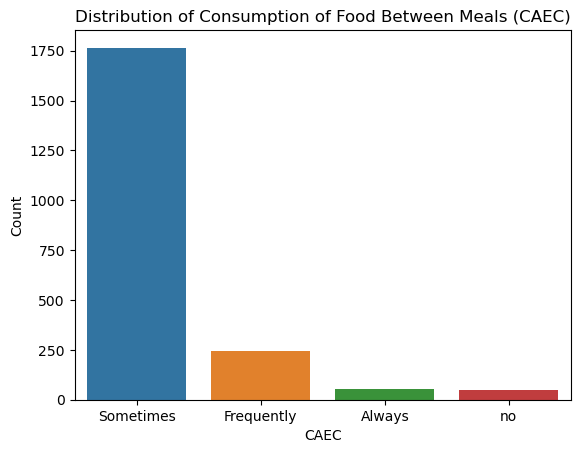

In [10]:
sns.countplot(data = df,
              x = 'CAEC')
plt.title('Distribution of Consumption of Food Between Meals (CAEC)')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.savefig('countplot6');

> It is more common for people to sometimes eat food between meals. It is least common for people to eat food between meals. 

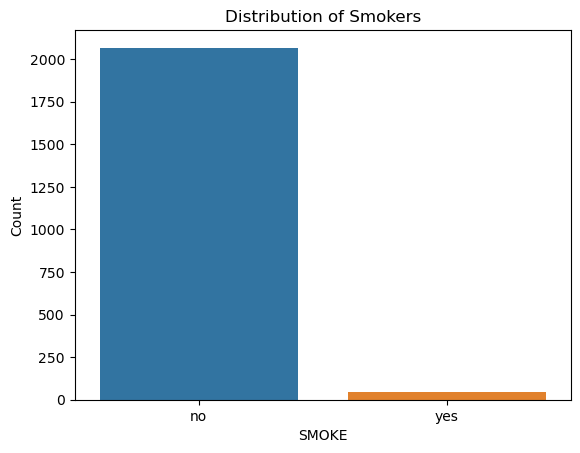

In [11]:
sns.countplot(data = df,
              x = 'SMOKE')
plt.title('Distribution of Smokers')
plt.xlabel('SMOKE')
plt.ylabel('Count')
plt.savefig('countplot7');

> More people state they do not smoke.

In [47]:
df.groupby('SMOKE')['Weight'].mean()

SMOKE
no     86.487697
yes    91.206810
Name: Weight, dtype: float64

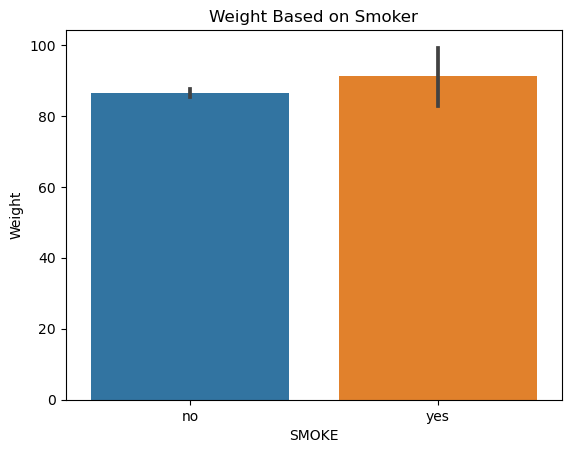

In [5]:
sns.barplot(data = df,
              x = 'SMOKE',
              y = 'Weight')
plt.title('Weight Based on Smoker')
plt.xlabel('SMOKE')
plt.ylabel('Weight')
plt.savefig('barplot3');

> There is not much difference in weight between whether an individual smokes or not. Those who smoke tend to have a higher weight. While those who do not smoke weight is a bit lower. 

In [49]:
df.groupby('CH2O')['Weight'].mean()

CH2O
1.000000     70.176320
1.000463    100.618239
1.000536    102.320437
1.000544    102.000122
1.000695     74.885222
               ...    
2.991671     83.016968
2.993448     55.003417
2.994515     79.278896
2.999495     87.861431
3.000000     81.271951
Name: Weight, Length: 1268, dtype: float64

In [50]:
df['CH2O'].value_counts()

CH2O
2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: count, Length: 1268, dtype: int64

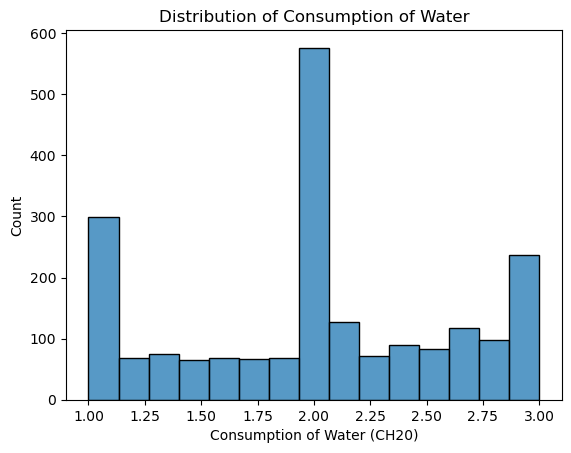

In [8]:
sns.histplot(data = df,
              x = 'CH2O')
plt.title('Distribution of Consumption of Water')
plt.xlabel('Consumption of Water (CH20)')
plt.ylabel('Count')
plt.savefig('histplot2');

>It is more common for people to drink 2 liters of water. 

In [52]:
df.groupby('CALC')['Weight'].mean()

CALC
Always        65.000000
Frequently    80.679024
Sometimes     91.425160
no            76.657257
Name: Weight, dtype: float64

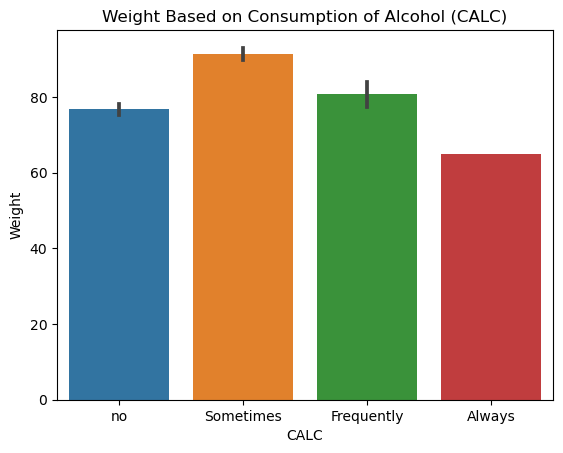

In [4]:
sns.barplot(data = df,
            x = 'CALC',
            y = 'Weight')
plt.title('Weight Based on Consumption of Alcohol (CALC)')
plt.xlabel('CALC')
plt.ylabel('Weight')
plt.savefig('barplot4');

> Those who say they somtimes drink alcohol have a higher weight. Those who frequently drink alcohol has the second highest weight. While those who say they always drink have the third highest weight.

In [54]:
df['CALC'].value_counts(normalize = True)

CALC
Sometimes     0.663667
no            0.302700
Frequently    0.033160
Always        0.000474
Name: proportion, dtype: float64

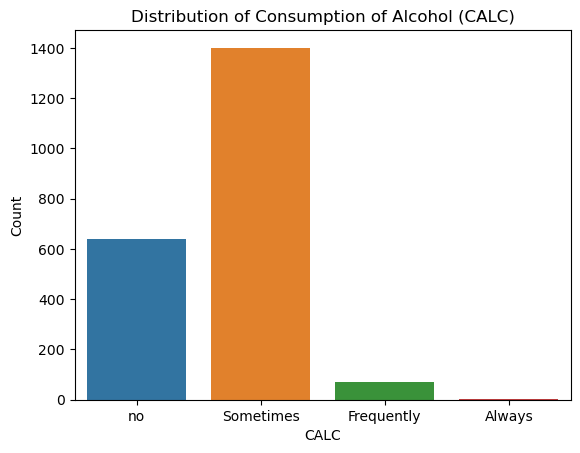

In [12]:
sns.countplot(data = df,
            x = 'CALC')
plt.title('Distribution of Consumption of Alcohol (CALC)')
plt.xlabel('CALC')
plt.ylabel('Count')
plt.savefig('countplot8');

> Less people always drink alcohol. More people state they drink alcohol sometimes.

In [56]:
df.groupby('SCC')['Weight'].mean()

SCC
no     87.740043
yes    62.364398
Name: Weight, dtype: float64

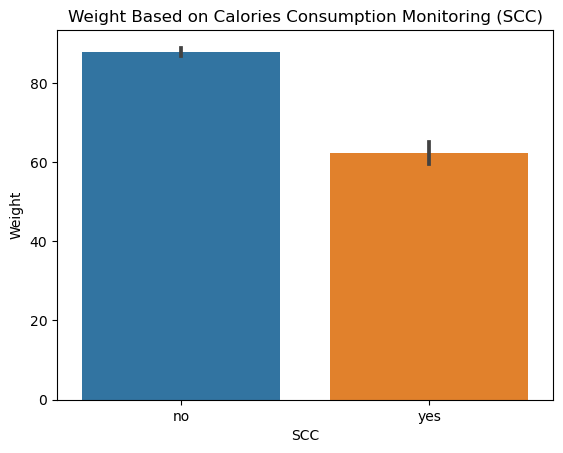

In [6]:
sns.barplot(data = df,
            x = 'SCC',
            y = 'Weight')
plt.title('Weight Based on Calories Consumption Monitoring (SCC)')
plt.xlabel('SCC')
plt.ylabel('Weight')
plt.savefig('barplot5');

> People who do not monitor their weight tend to hav a higher weight compared to those who do monitor their weight. 

In [58]:
df['SCC'].value_counts(normalize = True)

SCC
no     0.954524
yes    0.045476
Name: proportion, dtype: float64

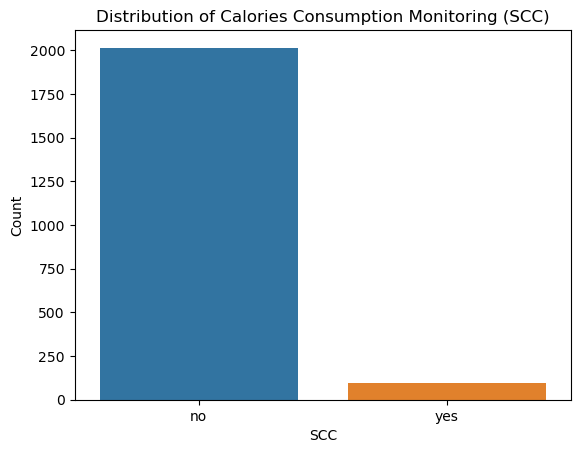

In [13]:
sns.countplot(data = df,
            x = 'SCC')
plt.title('Distribution of Calories Consumption Monitoring (SCC)')
plt.xlabel('SCC')
plt.ylabel('Count')
plt.savefig('countplot9');

> It is more common for people not to monitor their calorie consumption. 

In [60]:
df['FAF'].value_counts()

FAF
0.000000    411
1.000000    234
2.000000    183
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: count, Length: 1190, dtype: int64

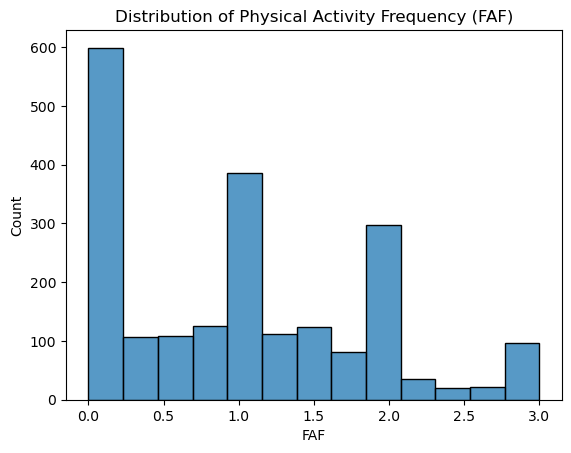

In [9]:
sns.histplot(data = df,
             x = 'FAF')
plt.title('Distribution of Physical Activity Frequency (FAF)')
plt.xlabel('FAF')
plt.ylabel('Count')
plt.savefig('histplot3');

> It is more common for people to be less physicaly active and less common for people to be more physically active.

In [62]:
df.groupby('FAF')['Weight'].mean()

FAF
0.000000     82.446127
0.000096    109.984263
0.000272    109.996742
0.000454    110.168166
0.001015    109.980145
               ...    
2.939733     80.000000
2.971832     78.370039
2.998981    101.780099
2.999918    103.586342
3.000000     72.296945
Name: Weight, Length: 1190, dtype: float64

In [63]:
df['TUE'].value_counts()

TUE
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
1.343044      1
1.019452      1
0.673408      1
0.997600      1
0.714137      1
Name: count, Length: 1129, dtype: int64

In [64]:
df.groupby('TUE')['Weight'].mean()

TUE
0.000000     78.683843
0.000073    114.906095
0.000355     61.411141
0.000436    114.330023
0.001096     61.616000
               ...    
1.980875     68.066090
1.983678     75.000000
1.990617     50.173425
1.992190    118.548733
2.000000     71.856428
Name: Weight, Length: 1129, dtype: float64

In [65]:
df['MTRANS'].value_counts(normalize = True)

MTRANS
Public_Transportation    0.748460
Automobile               0.216485
Walking                  0.026528
Motorbike                0.005211
Bike                     0.003316
Name: proportion, dtype: float64

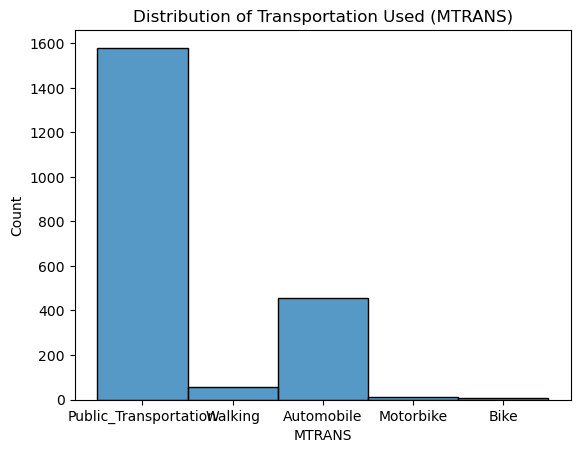

In [10]:
sns.histplot(data = df,
             x = 'MTRANS')
plt.title('Distribution of Transportation Used (MTRANS)')
plt.savefig('histplot4');

> Using public transportation is more common. The second most common is Automobile and the least common is bike. 

In [67]:
df.groupby('MTRANS')['Weight'].mean()

MTRANS
Automobile               85.907619
Bike                     76.714286
Motorbike                73.090909
Public_Transportation    87.486712
Walking                  70.596108
Name: Weight, dtype: float64

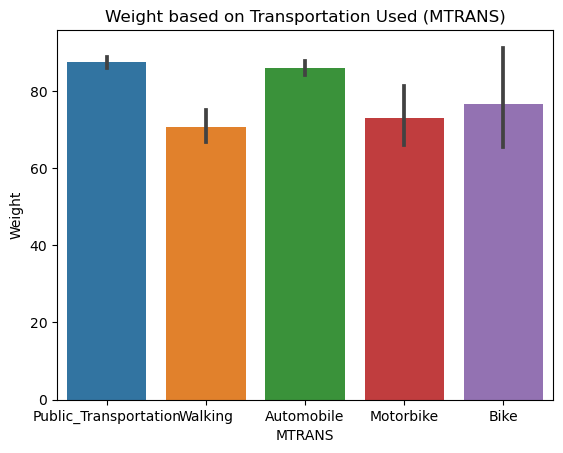

In [68]:
sns.barplot(data = df,
            x = 'MTRANS',
            y = 'Weight')
plt.title('Weight based on Transportation Used (MTRANS)')
plt.xlabel('MTRANS')
plt.ylabel('Weight')
plt.savefig('barplot6');

> Those who walk have a lower weight while those who use public transportation has the highest weight.

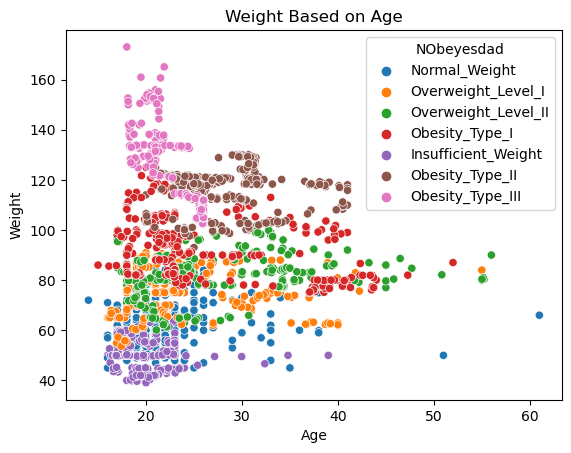

In [11]:
sns.scatterplot(data = df,
            x = 'Age',
            y = 'Weight',
            hue = 'NObeyesdad')
plt.title('Weight Based on Age')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.savefig('scatterplot1');

Obesity Type III is more common in ages 20-30 and ranges from 100 - 160 kilograms. Obesity Type II is ranges between ages 20-45.

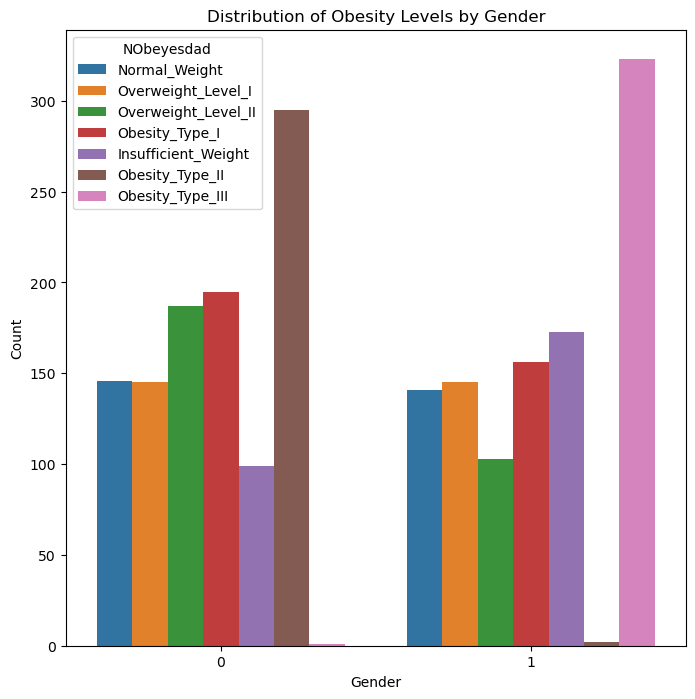

In [14]:
plt.figure(figsize = (8,8))
sns.countplot(data = df,
            x = 'Gender',
            hue = 'NObeyesdad')
plt.title ('Distribution of Obesity Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('counttplot10');

> Obesity Type II and Obesity Type I is most common in men. While Obesity Type III and insufficient weight is most common in women. 

In [71]:
dummy_df = pd.get_dummies(df,columns = ['Gender', 'family_history_with_overweight','FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

In [72]:
dummy_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_0,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,False,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,False,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,True,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,True,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,True,...,False,False,False,True,False,False,False,False,True,False


In [73]:
dummy_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_0',
       ...
       'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object', length=109)

In [74]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Gender_0', 'Gender_1',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'NObeyesdad_Insufficient_Weight',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II',
       'Gender_0.1', 'Gender_1.1', 'family_history_with_overweight_no.1',
       'family_history_with_overweight_yes.1

In [75]:
dummy_df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [76]:
'''sns.pairplot(data = df,
            x_vars =['Gender_0', 'Gender_1', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
             y_vars = ['Gender_0', 'Gender_1', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
             hue = 'NObeyesdad',
             corner = True
            );'''

"sns.pairplot(data = df,\n            x_vars =['Gender_0', 'Gender_1', 'family_history_with_overweight_no',\n       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',\n       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',\n       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',\n       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',\n       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',\n       'MTRANS_Walking'],\n             y_vars = ['Gender_0', 'Gender_1', 'family_history_with_overweight_no',\n       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',\n       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',\n       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',\n       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',\n       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',\n       'MTRANS_Walking'],\n             hue = 'NObeyesdad

# Modeling

In [77]:
# Baseline 
dummy_df['NObeyesdad'].value_counts(normalize = True)

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

In [78]:
dummy_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_0',
       ...
       'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object', length=109)

In [79]:
dummy_df.corr(numeric_only = True)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_0,Gender_1,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.048394,-0.048394,...,-0.116283,-0.011367,0.082566,-0.012483,-0.018803,0.604683,0.003652,0.020286,-0.554448,-0.063064
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.618466,-0.618466,...,-0.133753,-0.000391,0.045518,0.107070,-0.127828,0.077851,0.028996,-0.010471,-0.089684,0.036951
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.161668,-0.161668,...,-0.201906,-0.017947,-0.041778,0.259599,-0.249828,-0.013619,-0.021745,-0.037300,0.059332,-0.100805
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,-0.274505,0.274505,...,0.071852,-0.017090,-0.018655,0.082804,-0.077072,-0.061049,-0.029843,-0.007512,0.057966,0.013991
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.067600,-0.067600,...,-0.015624,-0.047176,-0.019126,0.099280,-0.092407,0.053424,0.023312,0.003875,-0.056849,0.006502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTRANS_Automobile,0.604683,0.077851,-0.013619,-0.061049,0.053424,-0.046237,0.002347,-0.165111,0.137560,-0.137560,...,-0.042965,-0.011443,0.088944,-0.078624,0.046732,1.000000,-0.030319,-0.038043,-0.906717,-0.086772
MTRANS_Bike,0.003652,0.028996,-0.021745,-0.029843,0.023312,0.026139,0.067129,-0.021725,0.057001,-0.057001,...,0.026960,-0.001256,-0.010682,-0.011261,0.015803,-0.030319,1.000000,-0.004175,-0.099496,-0.009522
MTRANS_Motorbike,0.020286,-0.010471,-0.037300,-0.007512,0.003875,-0.000946,-0.016351,-0.067402,0.045203,-0.045203,...,0.047362,-0.001576,-0.013403,-0.018109,0.023921,-0.038043,-0.004175,1.000000,-0.124844,-0.011947
MTRANS_Public_Transportation,-0.554448,-0.089684,0.059332,0.057966,-0.056849,0.037504,-0.048751,0.143597,-0.160184,0.160184,...,0.011255,-0.037553,-0.087755,0.097994,-0.064794,-0.906717,-0.099496,-0.124844,1.000000,-0.284754


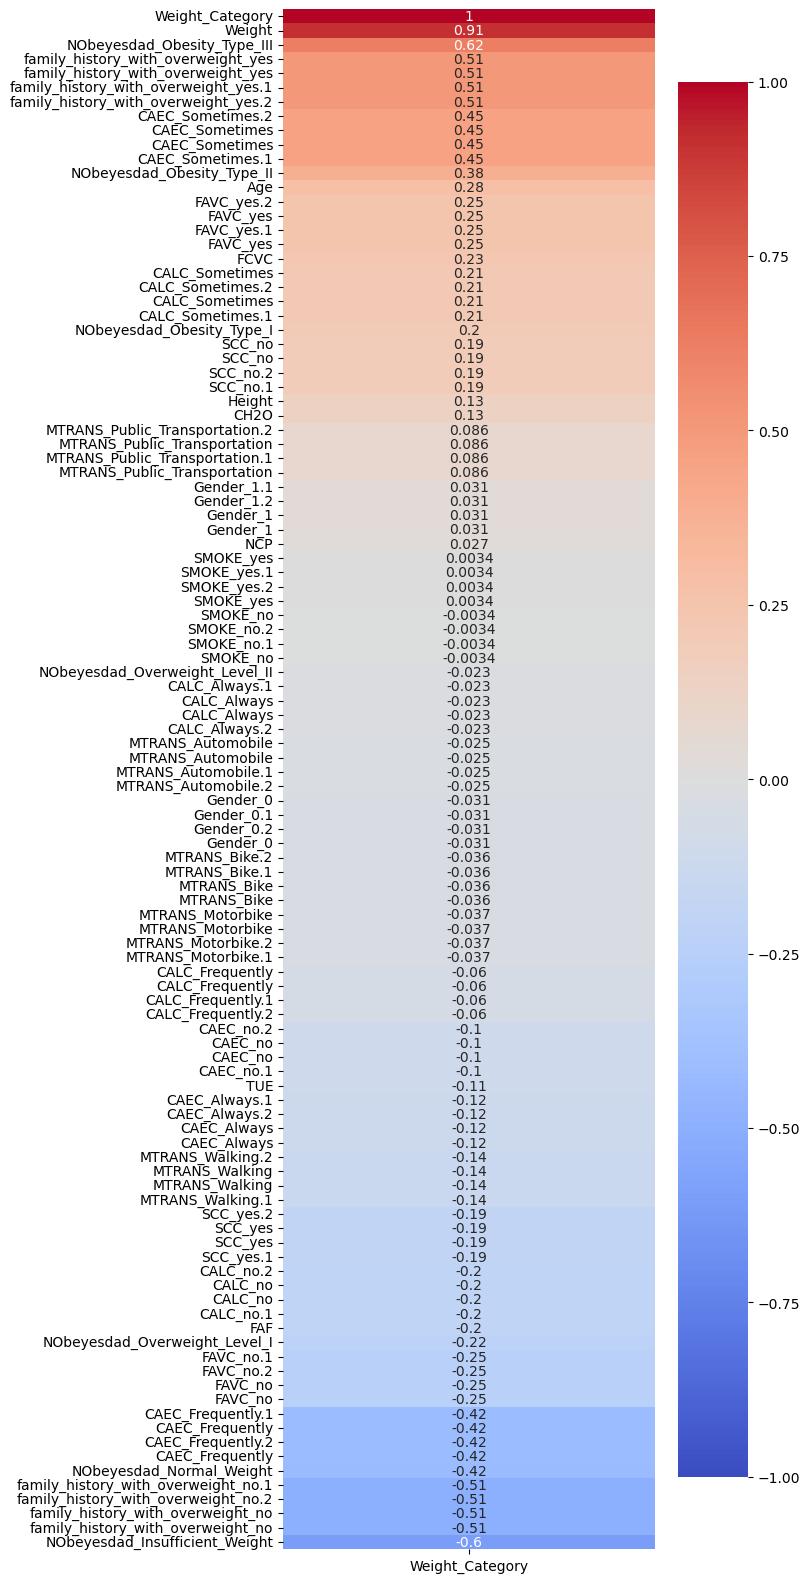

In [83]:
plt.figure(figsize = (6,20))
sns.heatmap(dummy_df.corr(numeric_only = True)[['Weight_Category']].sort_values(by = 'Weight_Category', ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

In [84]:
X = df[['Height','FAF','Gender', 'Weight', 'TUE']]
y = df['NObeyesdad']

In [85]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 42)

In [86]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [87]:
# KNN Neighbors
knn = KNeighborsClassifier()

In [88]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [89]:
knn.score(X_test_sc, y_test)

0.8314393939393939

In [90]:
knn.score(X_train_sc, y_train)

0.9027163613392293

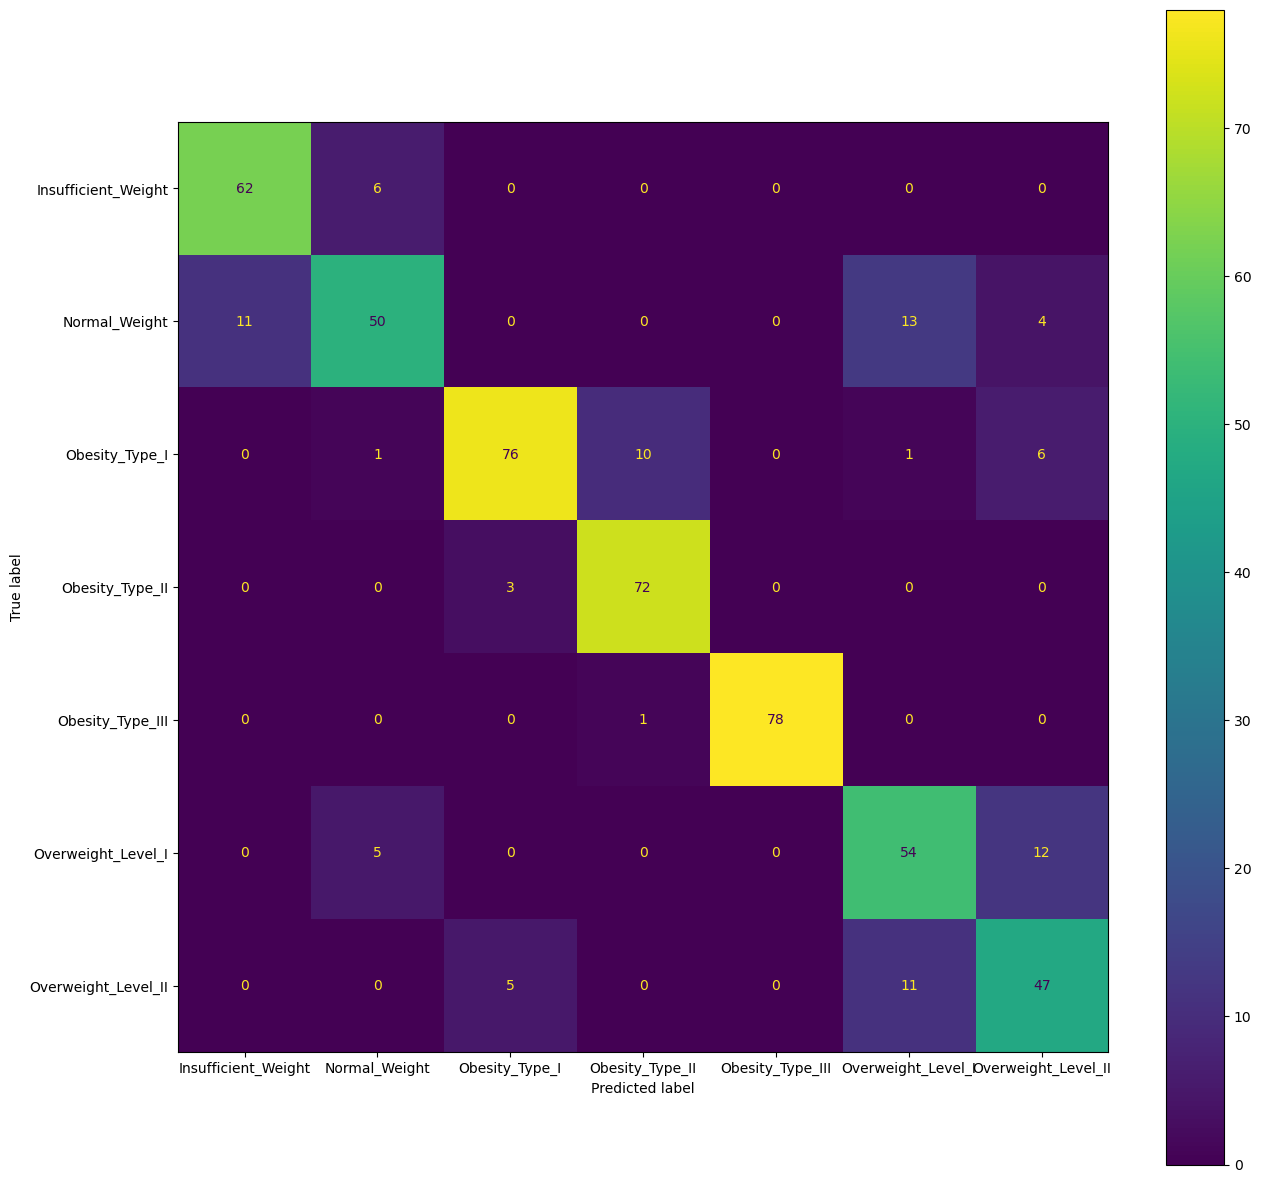

In [91]:
fig ,ax = plt.subplots(1,1,figsize=(15,15))
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, ax=ax)

In [92]:
scores = []
for k in range (1,32,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    training_acc = knn.score(X_train_sc, y_train)
    testing_acc = knn.score(X_test_sc,y_test)
    scores.append({'k':k, 'Training Accuracy': training_acc, 'Testing Accuracy': testing_acc})

In [93]:
df_score = pd.DataFrame(scores)
df_score

,k,Training Accuracy,Testing Accuracy
0,1,1.000000,0.878788
1,3,0.931775,0.848485
2,5,0.902716,0.831439
3,7,0.886924,0.818182
4,9,0.871762,0.785985
5,11,0.859760,0.767045
6,13,0.851548,0.748106
7,15,0.834491,0.740530
8,17,0.817435,0.727273
9,19,0.799747,0.714015


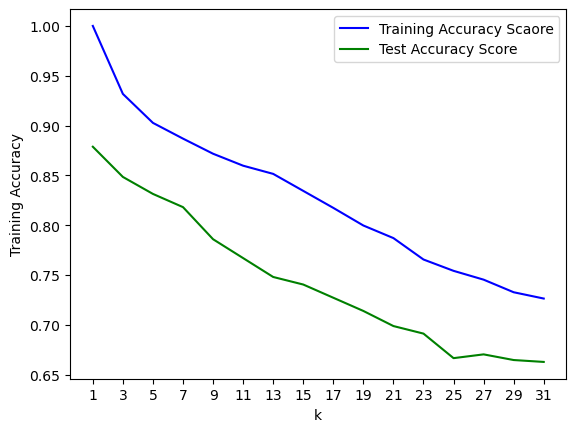

In [94]:
sns.lineplot(data = df_score,
             x = 'k',
             y = 'Training Accuracy',
             c = 'blue',
             label = 'Training Accuracy Scaore')
sns.lineplot(data = df_score,
             x = 'k',
             y = 'Testing Accuracy',
             c = 'green',
             label = 'Test Accuracy Score')
plt.xticks(range(1,32,2));

In [95]:
# Logistic Regression 
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [96]:
logr.score(X_train_sc, y_train)

0.901452937460518

In [97]:
logr.score(X_test_sc, y_test)

0.875

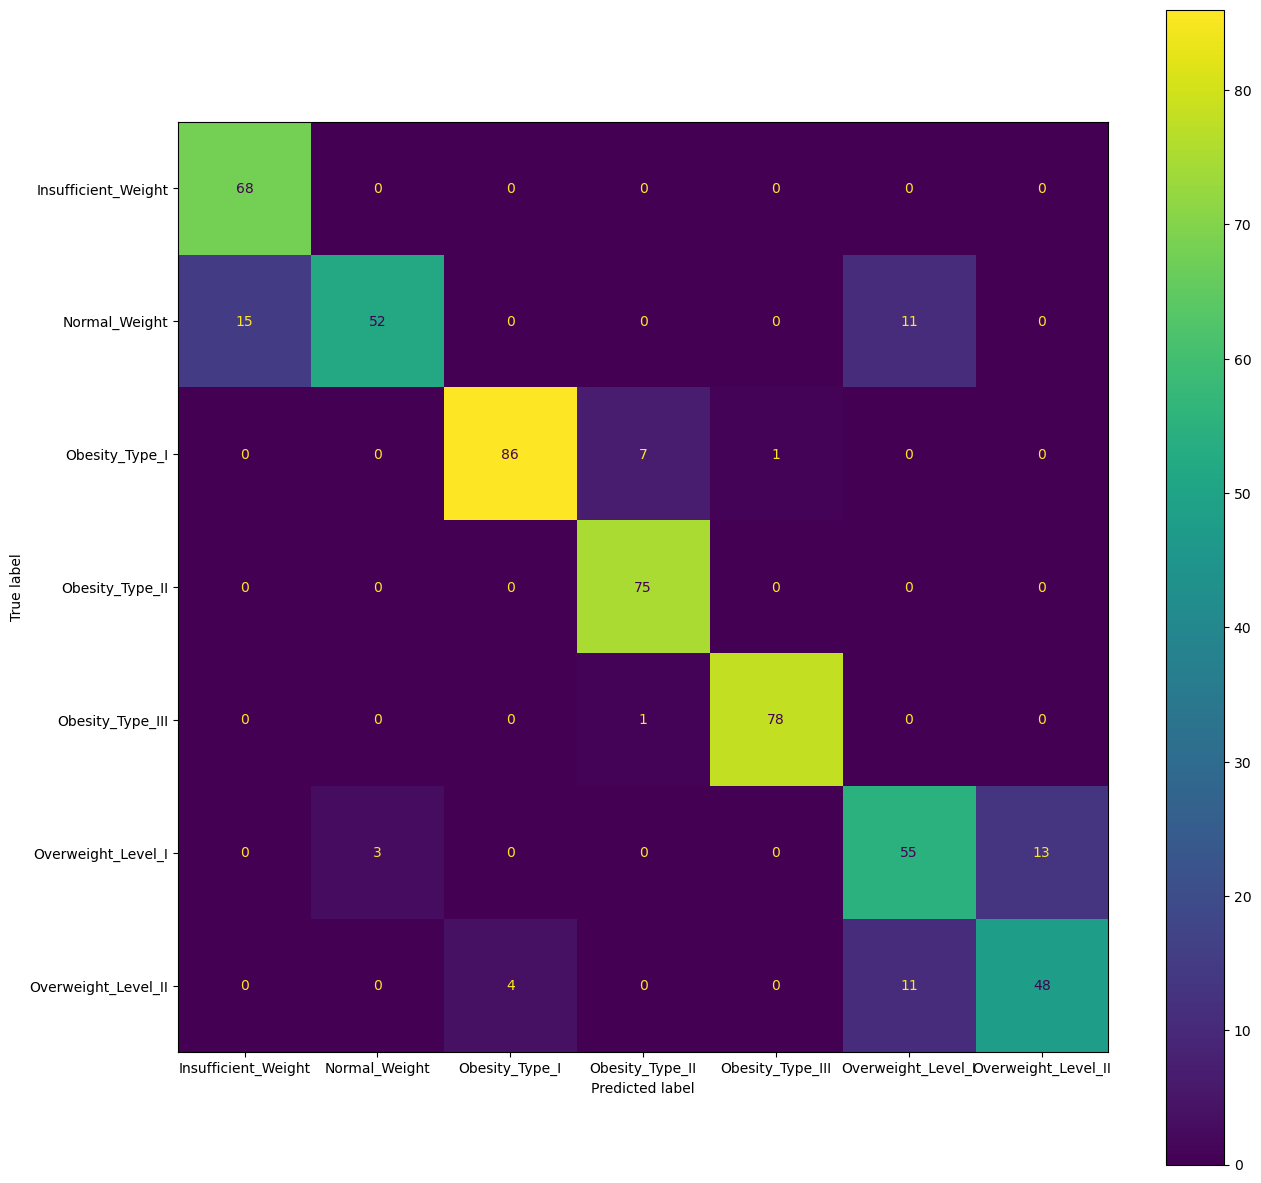

In [98]:
fig ,ax = plt.subplots(1,1,figsize=(15,15))
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, ax=ax)

In [99]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [100]:
rf.score(X_train_sc, y_train)

1.0

In [101]:
rf.score(X_test_sc, y_test)

0.9431818181818182

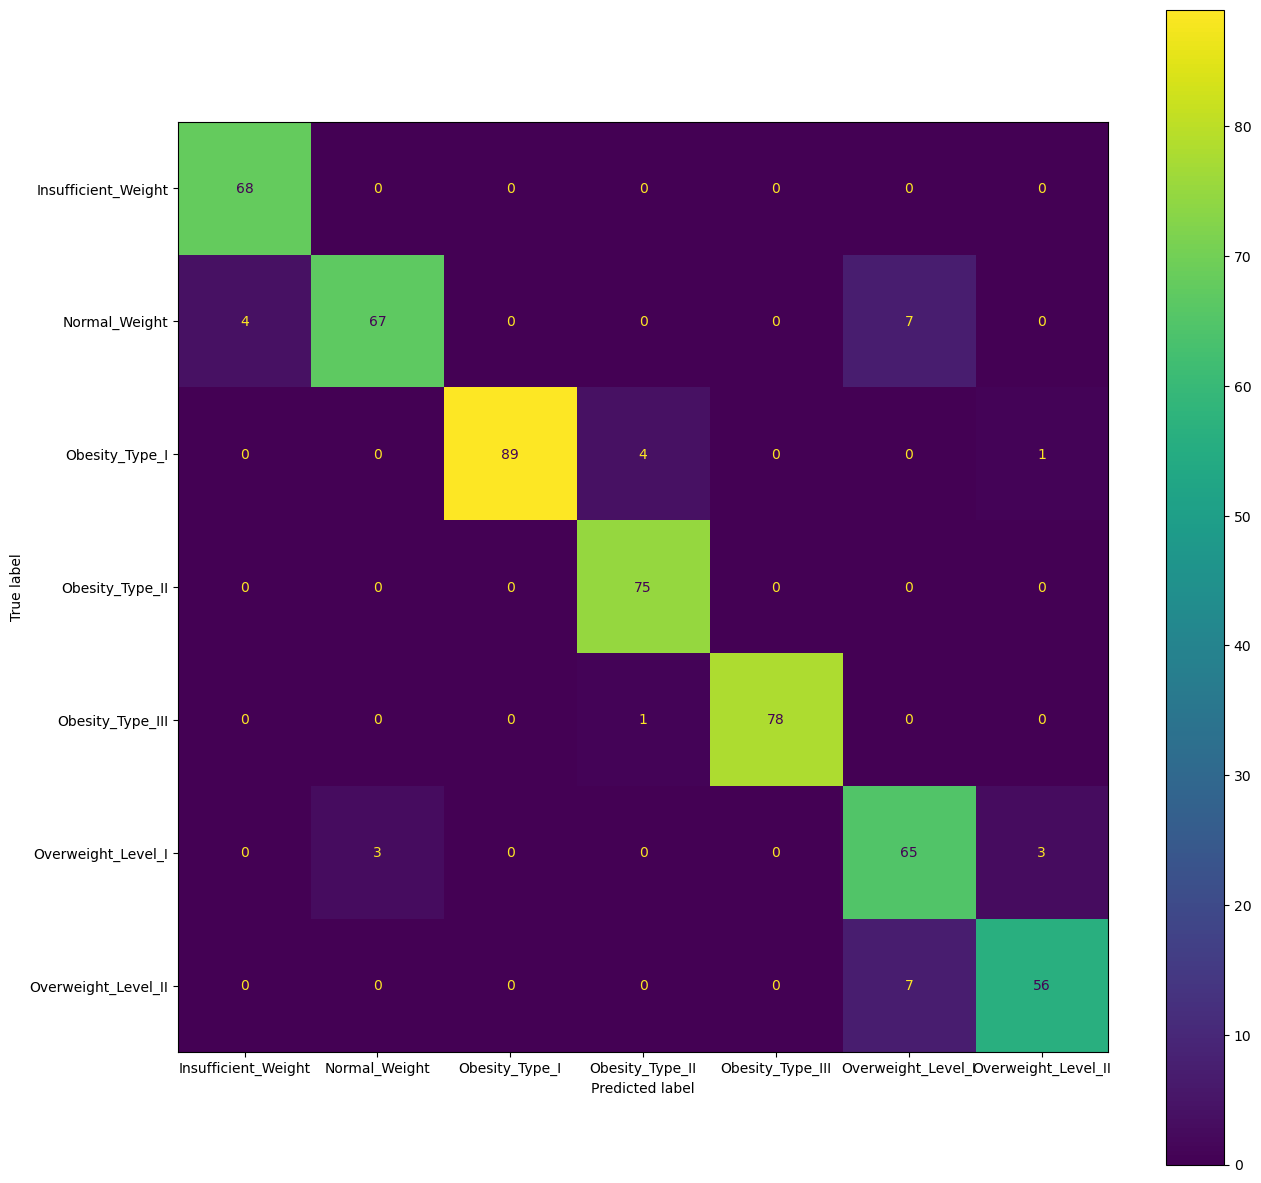

In [102]:
fig ,ax = plt.subplots(1,1,figsize=(15,15))
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, ax=ax)

In [15]:
df.to_csv('ObesityDataSet.csv',index = False)